# Application: Heterogeneous Effect of Gender on Wage Using Double Lasso

 We use US census data from the year 2012 to analyse the effect of gender and interaction effects of other variables with gender on wage jointly. The dependent variable is the logarithm of the wage, the target variable is *female* (in combination with other variables). All other variables denote some other socio-economic characteristics, e.g. marital status, education, and experience.  For a detailed description of the variables we refer to the help page.

This analysis allows a closer look how discrimination according to gender is related to other socio-economic variables.



In [2]:
install.packages("librarian", quiet = T)
librarian::shelf(hdm, quiet = T)
data(cps2012)
str(cps2012)

also installing the dependency ‘BiocManager’



  These packages will be installed:

  'hdm'

  It may take some time.

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘glmnet’, ‘checkmate’, ‘Formula’




'data.frame':	29217 obs. of  23 variables:
 $ year        : num  2012 2012 2012 2012 2012 ...
 $ lnw         : num  1.91 1.37 2.54 1.8 3.35 ...
 $ female      : num  1 1 0 1 0 0 0 0 0 1 ...
 $ widowed     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ divorced    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ separated   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nevermarried: num  0 0 0 0 0 0 1 0 0 0 ...
 $ hsd08       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsd911      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hsg         : num  0 0 1 1 0 1 1 0 0 0 ...
 $ cg          : num  0 0 0 0 1 0 0 0 1 0 ...
 $ ad          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mw          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ exp1        : num  22 30 19 14 15 23 33 23.5 15 15.5 ...
 $ exp2        : num  4.84 9 3.61 1.96 2.25 ...
 $ exp3        : num  10.65 27 6.86 2.74 3.38 ...
 $ exp4        : num  23.43 81 13.03 3.84 5.06 ...
 $ weight      : num  569 626 264 257 257 ...
 $ 

In [3]:
# create the model matrix for the covariates
X <- model.matrix(~-1 + female + female:(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + +(widowed +
divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +
we + exp1 + exp2 + exp3)^2, data = cps2012)
X <- X[, which(apply(X, 2, var) != 0)] # exclude all constant variables
demean<- function (x){ x- mean(x)}
X<- apply(X, 2, FUN=demean)
dim(X)

# target variables, index.gender specifices coefficients we are interested in
index.gender <- grep("female", colnames(X))
y <- cps2012$lnw

[1] 29217   116

The parameter estimates for the target parameters, i.e. all coefficients related to gender (i.e. by interaction with other variables) are calculated and summarized by the following commands:



In [4]:
# this cell takes a minute to run

effects.female <- rlassoEffects(x = X, y = y, index = index.gender)


In [5]:
result=summary(effects.female)
result$coef

,Estimate.,Std. Error,t value,Pr(>|t|)
female,-0.154923281,0.050162447,-3.08843149,2.012161e-03
female:widowed,0.136095484,0.090662629,1.50111997,1.333245e-01
female:divorced,0.136939386,0.022181700,6.17352970,6.678200e-10
female:separated,0.023302763,0.053211795,0.43792476,6.614408e-01
female:nevermarried,0.186853483,0.019942393,9.36966209,7.276511e-21
female:hsd08,0.027810312,0.120914496,0.22999982,8.180919e-01
female:hsd911,-0.119335040,0.051879684,-2.30022682,2.143537e-02
female:hsg,-0.012889780,0.019223188,-0.67053290,5.025181e-01
female:cg,0.010138553,0.018326505,0.55321800,5.801141e-01
female:ad,-0.030463745,0.021806103,-1.39702838,1.624050e-01


Now, we estimate and plot confident intervals, first "pointwise" and then the joint confidence intervals.

,5 %,95 %
female,-0.237433164,-0.072413398
female:widowed,-0.013031271,0.285222239
female:divorced,0.100453736,0.173425037
female:separated,-0.064222851,0.110828376
female:nevermarried,0.154051166,0.219655800
female:hsd08,-0.171076335,0.226696960
female:hsd911,-0.204669525,-0.034000554
female:hsg,-0.044509111,0.018729551
female:cg,-0.020005866,0.040282971
female:ad,-0.066331593,0.005404103


Warning message:
“Ignoring unknown aesthetics: width, h”


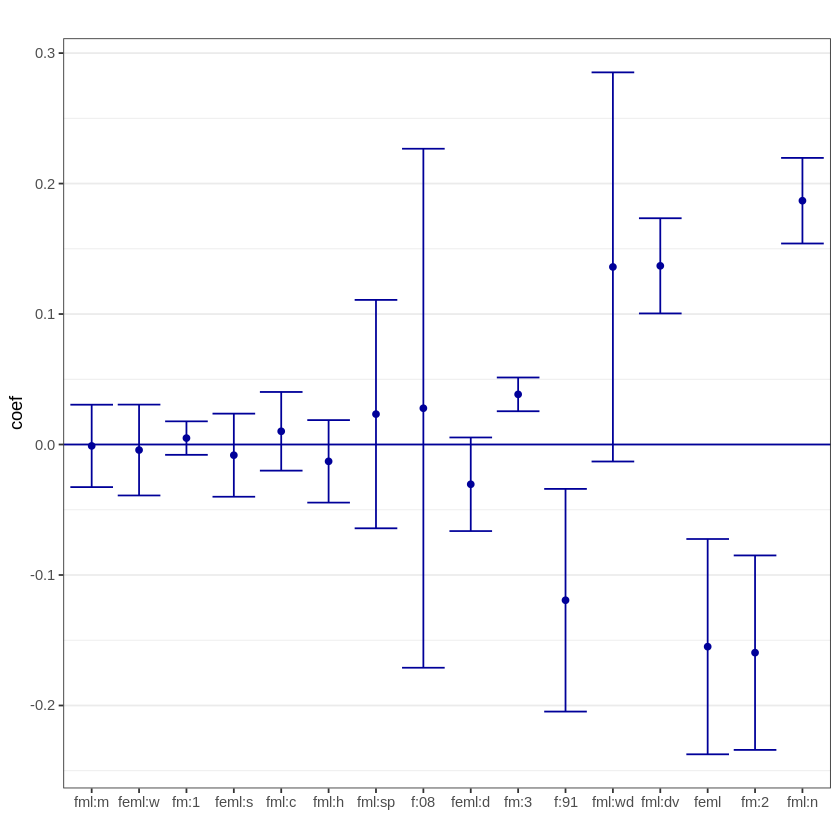

In [6]:
pointwise.CI <- confint(effects.female, level = 0.90)
pointwise.CI
plot(effects.female, level=0.90) # plot of the effects

Finally, we compare the pointwise confidence intervals to joint confidence intervals.

,5 %,95 %
female,-0.28721730,-0.02262927
female:widowed,-0.12010118,0.39229214
female:divorced,0.07792288,0.19595589
female:separated,-0.10967329,0.15627881
female:nevermarried,0.13215504,0.24155193
female:hsd08,-0.35426488,0.40988550
female:hsd911,-0.26149507,0.02282500
female:hsg,-0.06251119,0.03673163
female:cg,-0.03907505,0.05935216
female:ad,-0.09254849,0.03162100


Warning message:
“Ignoring unknown aesthetics: width, h”


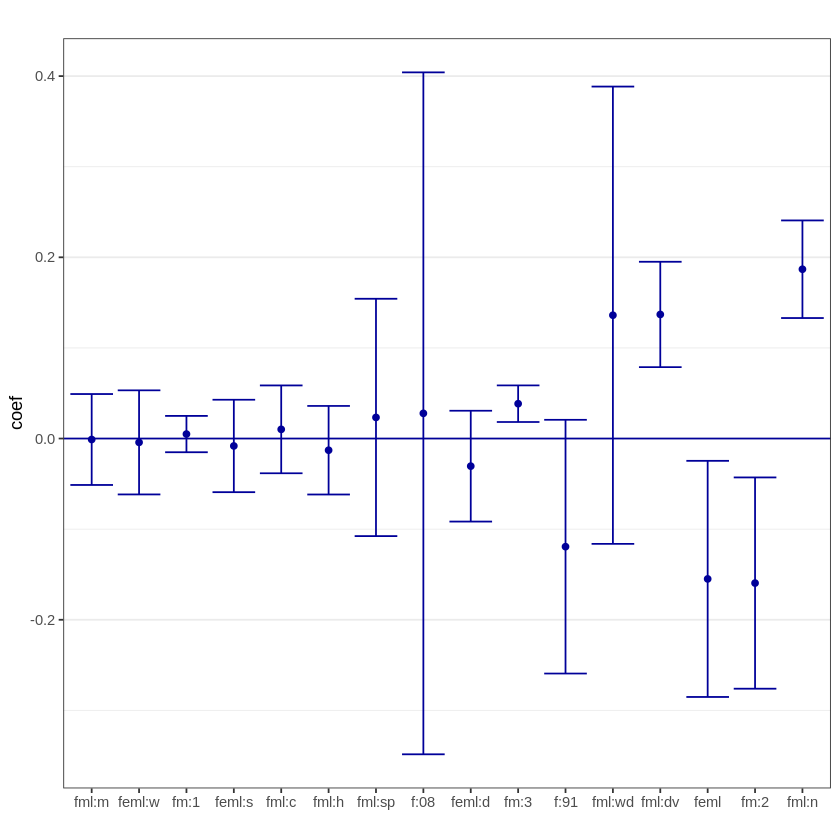

In [7]:
joint.CI <- confint(effects.female, level = 0.90, joint = TRUE)
joint.CI
plot(effects.female, joint=TRUE, level=0.90) # plot of the effects